# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [50]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
housing_data_df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/housing_data.csv")
titanic_data_df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/titanic_data.csv")
classified_data_df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/classified_data.txt")

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [53]:
# import numpy, pandas, matplotlib, seaborn
# add code here
%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [54]:
# add code here
housing_data_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [55]:
# add code here
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [56]:
# add code here
housing_data_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [57]:
# add code here
for i in housing_data_df.columns:
  print(i)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

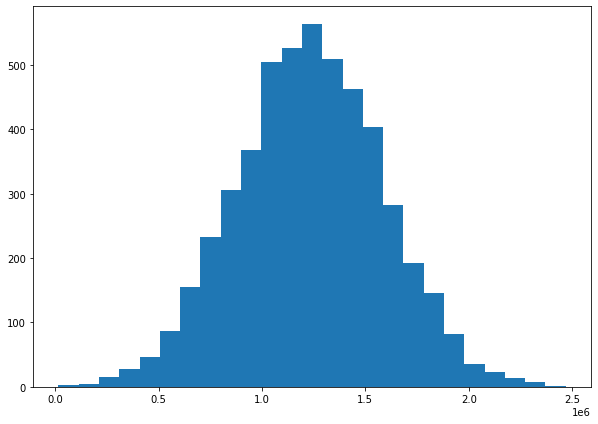

In [58]:
# add code here
a = housing_data_df["Price"] 
b = 25
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = b)
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [59]:
# add code here
housing_data_df.corr() 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [60]:
# add code here
lst = housing_data_df.columns
lst

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [61]:
# This code should print (5000, 5) and (5000,) if everything is correct
X = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/housing_data.csv")
X.drop(["Price", "Address"], axis=1, inplace=True)
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [62]:
Y = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/housing_data.csv")
Y.drop(["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population","Address"], axis=1, inplace=True)
Y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [63]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [64]:
# print a few record of y
# add code here
Y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Test-train split

**Import train_test_split function from scikit-learn**

In [65]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [66]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #random-state=123

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [67]:
# add code here
print("size and shape of X_train: ",X_train.size, X_train.shape)
print("size and shape of X_test: ",X_test.size, X_test.shape)
print("size and shape of y_train: ",y_train.size, y_train.shape)
print("size and shape of y_test: ",y_test.size, y_test.shape)

size and shape of X_train:  17500 (3500, 5)
size and shape of X_test:  7500 (1500, 5)
size and shape of y_train:  3500 (3500, 1)
size and shape of y_test:  1500 (1500, 1)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [68]:
# add code for imports here
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [69]:
# add code here
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [70]:
# add code here
predictions = lm.predict(X_test)
print(type(predictions), predictions.size)

<class 'numpy.ndarray'> 1500


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

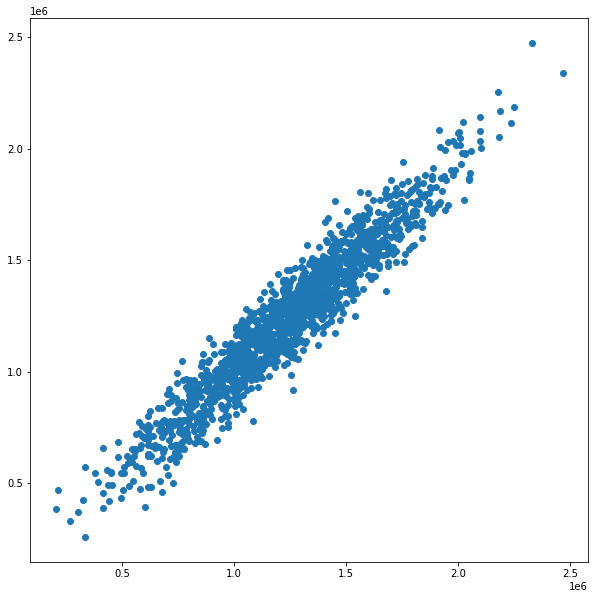

In [71]:
# add code here
plt.figure(figsize=(10,10))
plt.scatter(y=predictions, x=y_test) 
plt.show()

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [72]:
# add code here
from sklearn.metrics import r2_score
print(f'r2 score: {r2_score(y_test, predictions):.3f}')

r2 score: 0.915


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [73]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [74]:
# add code here
df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/classified_data.txt", index_col=[0])
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [75]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [76]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [77]:
# add code here
ls=[]
lsc=[]
for i in df.columns:
  ls.append(i)
  lsc.append(i)
# ls.remove('Unnamed: 0') 
lsc.remove('TARGET CLASS')
print(ls)
n = len(ls)
print(n)

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ', 'TARGET CLASS']
11


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

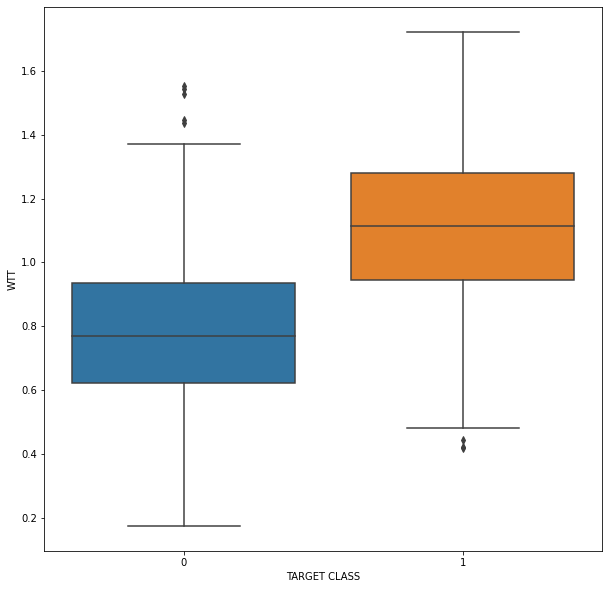

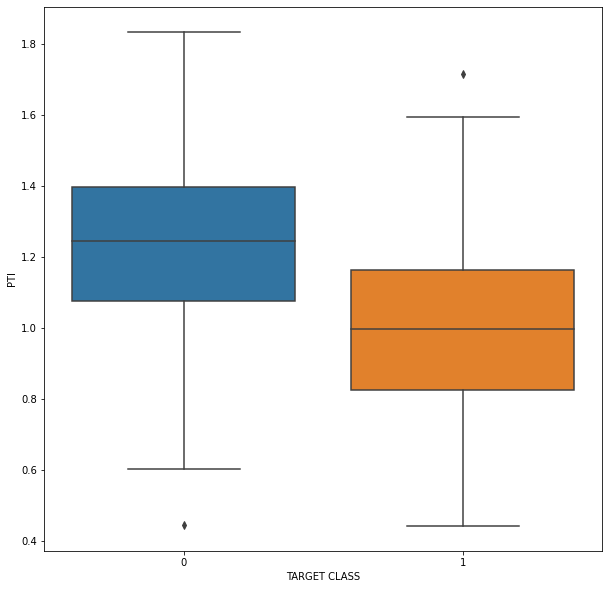

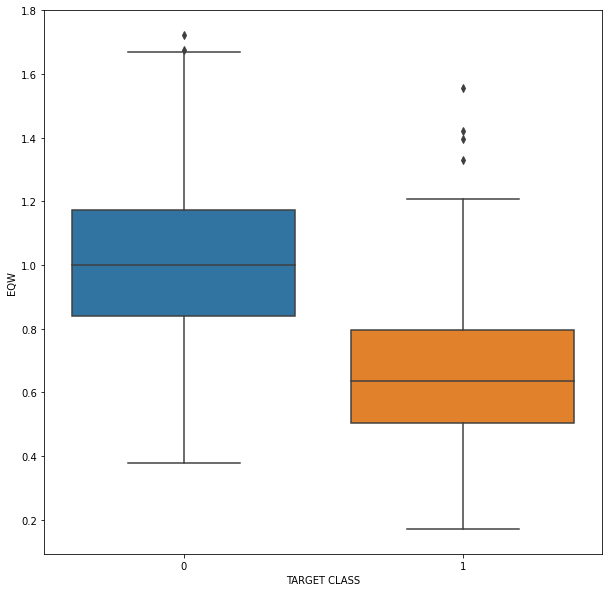

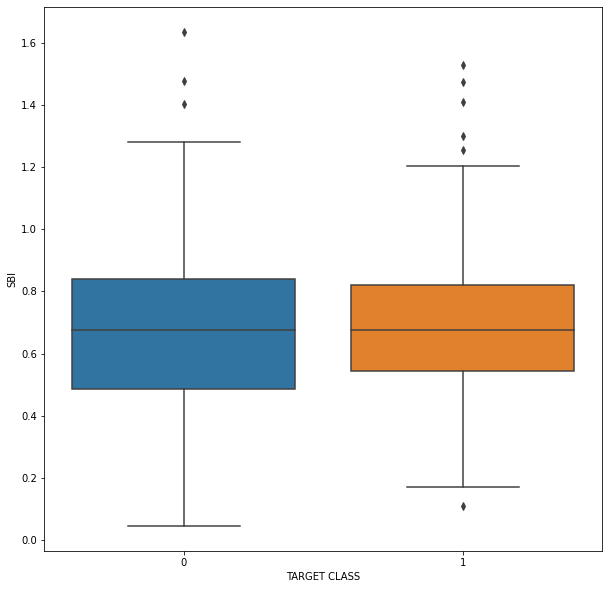

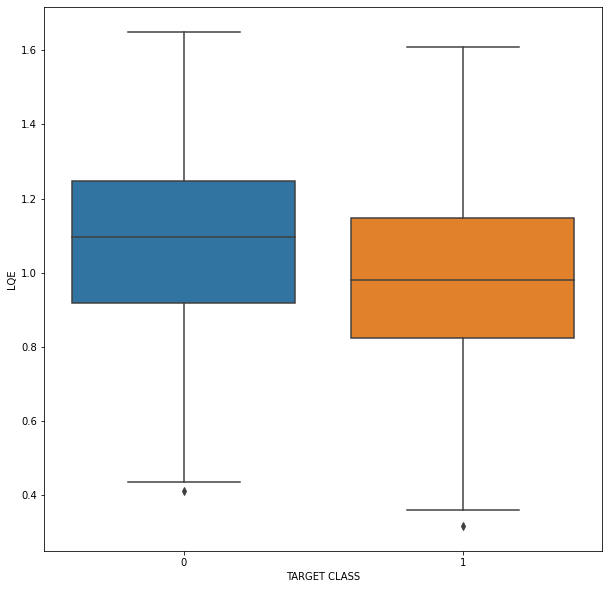

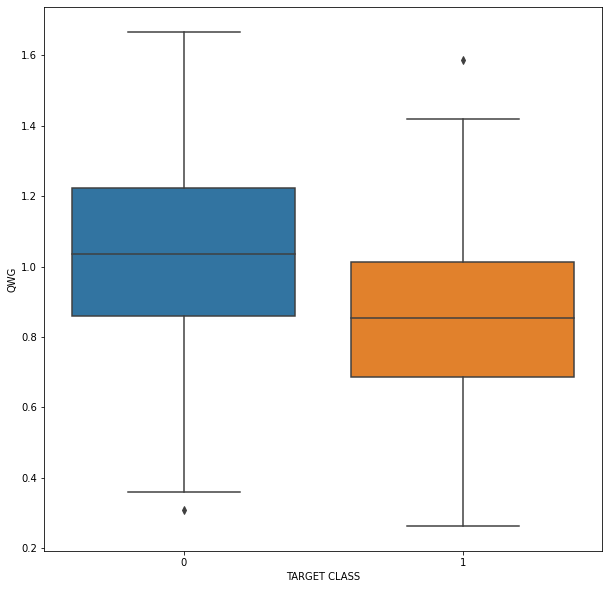

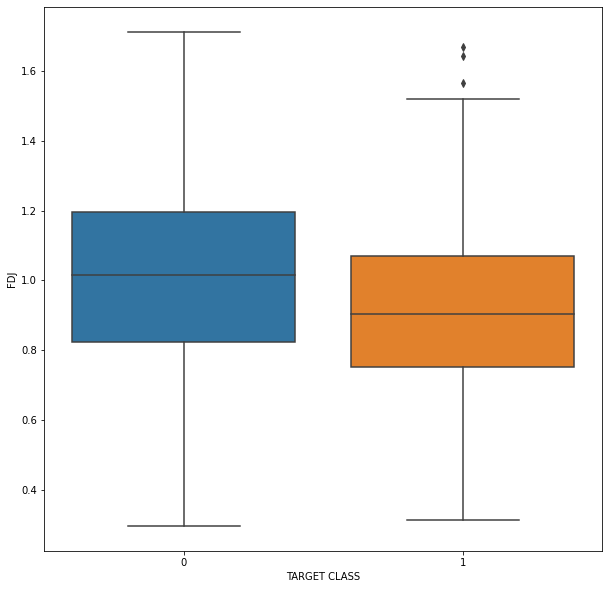

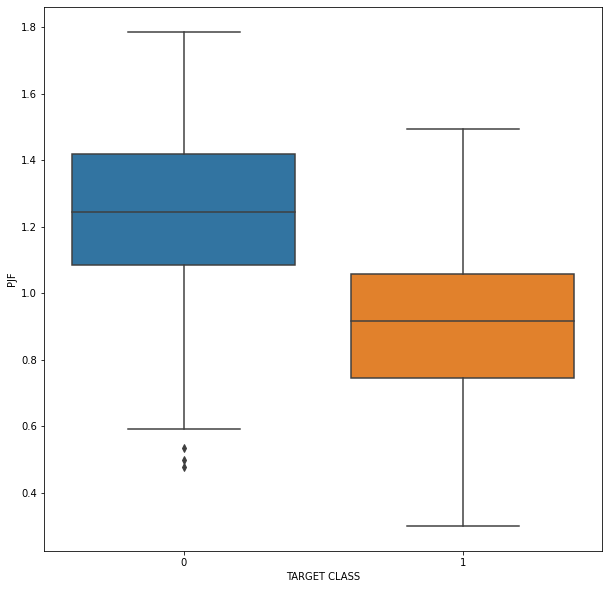

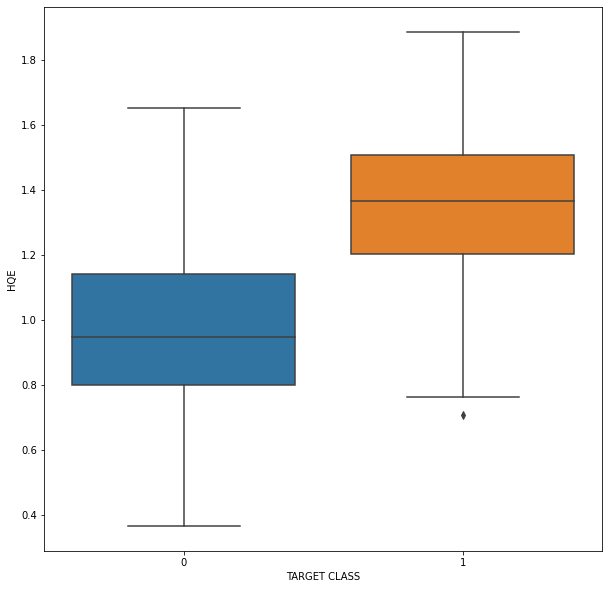

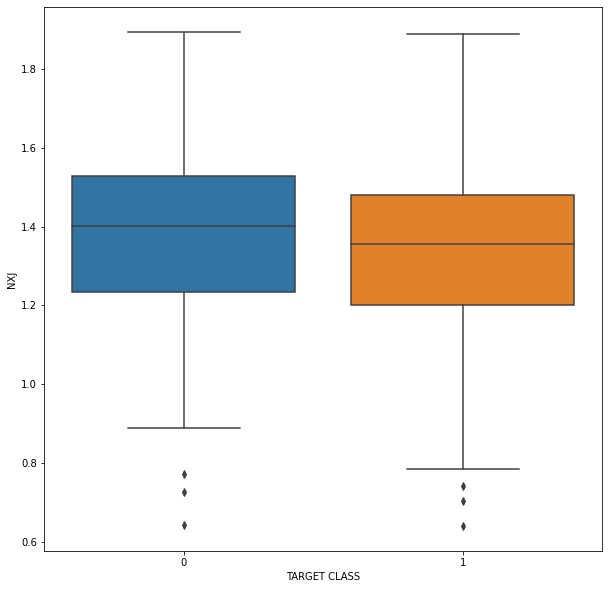

In [78]:
# add code here
features= ls[:-1]
for i in features:
  plt.figure(figsize = (10, 10))
  sns.boxplot(data=df, x='TARGET CLASS', y=i)
  plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [79]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [80]:
# add code here
# for i in range(n):
sample_df = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/classified_data.txt", index_col=False)
sample_df.drop('TARGET CLASS', inplace=True, axis=1)
sample_df.drop('Unnamed: 0', inplace=True, axis=1)
sample_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [81]:
a = scaler.fit(sample_df)

In [82]:
b = a.transform(sample_df)
b

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [83]:
# add code here
df_feat = pd.DataFrame(b)
df_feat.columns = ['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']
df_feat.head() 

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [84]:
# add code here
x = df_feat
x

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [85]:
dqrf = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/classified_data.txt", index_col=[0])
# Y.drop(lsc, axis=1, inplace=True)
# Y.drop(['Unnamed: 0'], axis=1, inplace=True)
# Y
Y=dqrf['TARGET CLASS']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [86]:
# add code here
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42) #random_state=101

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [87]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
fitted_model = classifier.fit(x_train, Y_train)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [88]:
# add code here
pred = fitted_model.predict(x_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [89]:
# add code here
from sklearn.metrics import classification_report
d=classification_report(Y_test, pred, output_dict=True)
print(d)

{'0': {'precision': 0.9241379310344827, 'recall': 0.9436619718309859, 'f1-score': 0.9337979094076655, 'support': 142}, '1': {'precision': 0.9483870967741935, 'recall': 0.930379746835443, 'f1-score': 0.939297124600639, 'support': 158}, 'accuracy': 0.9366666666666666, 'macro avg': {'precision': 0.9362625139043381, 'recall': 0.9370208593332144, 'f1-score': 0.9365475170041522, 'support': 300}, 'weighted avg': {'precision': 0.9369091583240636, 'recall': 0.9366666666666666, 'f1-score': 0.9366941627426316, 'support': 300}}


**Print the accuracy using numpy and round it to 3 decimal places.**

In [90]:
# add code here
# acc = (float)(d['accuracy'])
# print('{0:.3f}'.format(acc))
acc = np.sum(pred==Y_test)/len(pred)
print('{0:.3f}'.format(acc))

0.937


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [91]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
k_list = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
for i in range(1,61):
  classify = KNeighborsClassifier(n_neighbors=i)
  fit_model = classify.fit(x_train, Y_train)
  predict = fit_model.predict(x_test)
  t=classification_report(Y_test, predict, output_dict=True)
  # accu = (float)(t['accuracy'])
  accu =( (np.sum(predict==Y_test))/len(predict) )
  k_list.append(accu)
# add code here

**Plot a graph of K value vs Accuracy**

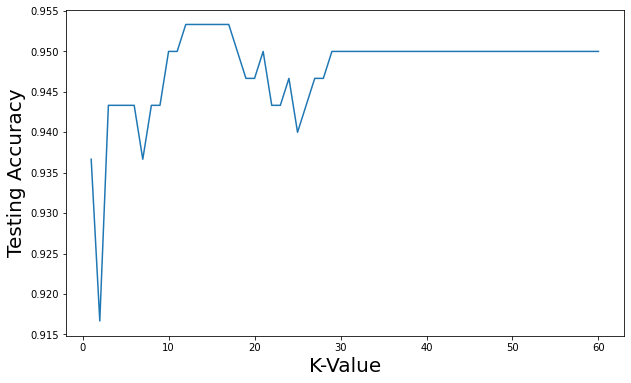

In [92]:
# add code here
a_list = list(range(1, 61))
plt.figure(figsize=(10,6))
plt.plot(a_list,k_list)
plt.xlabel("K-Value", fontsize = 20)
plt.ylabel("Testing Accuracy", fontsize = 20)
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [93]:
# add code here 
# For K-Value between 12-17, Accuracy is same for all of them and its the highest among 1-60. 
# Lower value of K will make model more complex unnecessarily. This might become a case of overfitting the data.
# Also the model is not too much computationally expensive even for higher values. As we increase the number of neighbors, the model starts to generalize well.
# So i thought of using a higher value of k taking into account a good accuracy. 
# So I feel n_neighbors=17 could be an optimal value.
print("Best value of n_neighbours = 17 & corresponding accuracy is:",k_list[16])

Best value of n_neighbours = 17 & corresponding accuracy is: 0.9533333333333334


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [105]:
#write code here
titanic_data_df2 = pd.read_csv("/content/gdrive/My Drive/Synapse_LP/synapse_w2/synapse_w2/titanic_data.csv")
titanic_data_df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [106]:
import re

def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new

def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
  title_list = []
  for i in df["Name"]:
    title_search = re.search('(\w+)\.', i)
    if title_search:
      title = title_search.group(1)
      title_list.append(title)
  df["Title"] = title_list
  df = df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=False)
  df = df.drop(["Cabin"], axis=1, inplace=False)
  df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=False) 
  df["Age"] = df["Age"].fillna(df["Age"].mean(), inplace=False)
  df["Family_members"] = df["SibSp"] + df["Parch"]
  df = df.drop(["SibSp", "Parch"], axis=1, inplace=False)
  df["Age"] = normalize(df["Age"])
  df["Fare"] = normalize(df["Fare"])
  df["Family_members"] = normalize(df["Family_members"])
  df = pd.get_dummies(df, columns=["Pclass", "Sex", "Title", "Embarked"])
  return df

In [107]:
done2_df = titanic_preprocessing_pipeline(titanic_data_df2)
done2_df

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [108]:
ns = done2_df['Survived'] 
ns

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [109]:
done2_df.drop(["Survived"], axis=1, inplace=True)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [110]:
from sklearn.model_selection import train_test_split
c_train, c_test, v_train, v_test = train_test_split(done2_df, ns, test_size=0.3, random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [128]:
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

def populate_dict(c, i, j, k, mf, a1, a2, n):
  d = {}
  d["n_estimators"] = n
  d["criterion"] = c
  d["max_depth"] = i 
  d["min_samples_split"] = j
  d["min_samples_leaf"] = k
  d["max_features"] = mf
  d["test_acc"] = a1
  d["train_acc"] = a2
  diff = a2-a1
  d["diff"] = diff
  return d

In [129]:
cr_list=['entropy', 'gini']
# sp_list=["best", "random"]
msl_list=[5,10,15,30]
mss_list=[5,10,15,30]
maxd_list=[3,5,10,15,20]
mf_list=["auto", "sqrt", "log2",None]
n_estimators_list = [50, 100, 150, 200]
result=[]

for ne in n_estimators_list:
  # for s in range(0,42):
    # for mln in range(2,5):
  for mf in range(len(mf_list)):
    for msl in msl_list:
      for mss in mss_list:
              # for sp in range(len(sp_list)):
        for cr in range(len(cr_list)):
                  # for jk in range(0,3):
          for i in maxd_list:
                      # decision_tree = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=mln,max_features=mf_list[mf],min_samples_leaf=msl,min_samples_split=mss, splitter=sp_list[sp],criterion=cr_list[cr], random_state=jk, max_depth=i),n_estimators=ne, random_state=s ) #criterion="entropy",
                      # decision_tree = DecisionTreeClassifier(max_leaf_nodes=mln,max_features=mf_list[mf],min_samples_leaf=msl,min_samples_split=mss, splitter=sp_list[sp],criterion=cr_list[cr], random_state=jk, max_depth=i)
            decision_tree = RandomForestClassifier(max_features=mf_list[mf],min_samples_leaf=msl,min_samples_split=mss, criterion=cr_list[cr], max_depth=i, n_estimators=ne)
            decisiontree = decision_tree.fit(c_train,v_train)
            train_pred = decisiontree.predict(c_train)
            gff = classification_report(v_train, train_pred, output_dict=True)
            train_ac = (float)(gff['accuracy'])
            myy_pred = decisiontree.predict(c_test)
            gf = classification_report(v_test,myy_pred, output_dict=True)
            ac = (float)(gf['accuracy'])
            di = populate_dict(cr_list[cr], i, mss, msl, mf_list[mf], ac, train_ac, ne)
            result.append(di)

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [137]:
sorted(result, key=lambda d : d["diff"], reverse=True)

[{'criterion': 'entropy',
  'diff': 0.1024951486547998,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 200,
  'test_acc': 0.7947761194029851,
  'train_acc': 0.8972712680577849},
 {'criterion': 'entropy',
  'diff': 0.1024951486547998,
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 5,
  'min_samples_split': 10,
  'n_estimators': 200,
  'test_acc': 0.7947761194029851,
  'train_acc': 0.8972712680577849},
 {'criterion': 'entropy',
  'diff': 0.0998478713974269,
  'max_depth': 15,
  'max_features': None,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 100,
  'test_acc': 0.8022388059701493,
  'train_acc': 0.9020866773675762},
 {'criterion': 'gini',
  'diff': 0.09980594619199357,
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 100,
  'test_acc': 0.7910447761194029,
  'train_acc': 0.8908507223113965},
 {'criterion': 'gini',
  'dif

In [131]:
sorted(result, key=lambda d : d["diff"], reverse=False)

[{'criterion': 'gini',
  'diff': -0.026915981888311236,
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 30,
  'min_samples_split': 15,
  'n_estimators': 100,
  'test_acc': 0.8134328358208955,
  'train_acc': 0.7865168539325843},
 {'criterion': 'entropy',
  'diff': -0.02687405668287779,
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 10,
  'min_samples_split': 5,
  'n_estimators': 50,
  'test_acc': 0.8246268656716418,
  'train_acc': 0.797752808988764},
 {'criterion': 'gini',
  'diff': -0.026352986272489942,
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 15,
  'min_samples_split': 10,
  'n_estimators': 50,
  'test_acc': 0.8208955223880597,
  'train_acc': 0.7945425361155698},
 {'criterion': 'entropy',
  'diff': -0.024268704630938442,
  'max_depth': 5,
  'max_features': 'auto',
  'min_samples_leaf': 30,
  'min_samples_split': 30,
  'n_estimators': 50,
  'test_acc': 0.8059701492537313,
  'train_acc': 0.7817014446227929},
 {'criterion': '

<b>print the test accuracy and train accuracy here</b>

In [136]:
print( 'Random Forest')
print(  {'criterion': 'gini',
  'diff': 0.021843032030856913,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 30,
  'n_estimators': 50,
  'test_acc': 0.832089552238806,
  'train_acc': 0.8539325842696629} )

Random Forest
{'criterion': 'gini', 'diff': 0.021843032030856913, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 50, 'test_acc': 0.832089552238806, 'train_acc': 0.8539325842696629}


End